# 🏦 LoanVision: Loan Prediction Mini Project
---
This project aims to analyze a loan dataset and build a prediction model to determine loan approval status based on various applicant features.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# To display plots inline
%matplotlib inline


In [2]:

# Load the dataset
df = pd.read_csv('loan_data.csv')
print("Dataset Loaded Successfully ✅")
df.head()


Dataset Loaded Successfully ✅


,age,gender,marital_status,education_level,annual_income,monthly_income,employment_status,debt_to_income_ratio,credit_score,loan_amount,...,loan_term,installment,grade_subgrade,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
0,59,Male,Married,Master's,24240.19,2020.02,Employed,0.074,743,17173.72,...,36,581.88,B5,7,40833.47,24302.07,1,0,1,1
1,72,Female,Married,Bachelor's,20172.98,1681.08,Employed,0.219,531,22663.89,...,60,573.17,F1,5,27968.01,10803.01,1,0,3,1
2,49,Female,Single,High School,26181.80,2181.82,Employed,0.234,779,3631.36,...,60,76.32,B4,2,15502.25,4505.44,0,0,0,1
3,35,Female,Single,High School,11873.84,989.49,Employed,0.264,809,14939.23,...,36,468.07,A5,7,18157.79,5525.63,4,0,5,1
4,63,Other,Single,Other,25326.44,2110.54,Employed,0.260,663,16551.71,...,60,395.50,D5,1,17467.56,3593.91,2,0,2,1


In [3]:

# Display dataset information
print("Shape of the dataset:", df.shape)
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


Shape of the dataset: (20000, 22)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   20000 non-null  int64  
 1   gender                20000 non-null  object 
 2   marital_status        20000 non-null  object 
 3   education_level       20000 non-null  object 
 4   annual_income         20000 non-null  float64
 5   monthly_income        20000 non-null  float64
 6   employment_status     20000 non-null  object 
 7   debt_to_income_ratio  20000 non-null  float64
 8   credit_score          20000 non-null  int64  
 9   loan_amount           20000 non-null  float64
 10  loan_purpose          20000 non-null  object 
 11  interest_rate         20000 non-null  float64
 12  loan_term             20000 non-null  int64  
 13  installment           20000 non-null  float64
 14  grade_subgrade       

In [4]:

# Fill missing categorical values with mode and numeric with median
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
age                     0
gender                  0
marital_status          0
education_level         0
annual_income           0
monthly_income          0
employment_status       0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
loan_purpose            0
interest_rate           0
loan_term               0
installment             0
grade_subgrade          0
num_of_open_accounts    0
total_credit_limit      0
current_balance         0
delinquency_history     0
public_records          0
num_of_delinquencies    0
loan_paid_back          0
dtype: int64


C:\Users\shiva ganesh\AppData\Local\Temp\ipykernel_20984\3624885033.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\shiva ganesh\AppData\Local\Temp\ipykernel_20984\3624885033.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [5]:

# Automatically detect target column (anything containing 'status')
target_col = None
for col in df.columns:
    if 'status' in col.lower():
        target_col = col
        break

if target_col is None:
    raise ValueError("❌ Target column not found. Please check dataset columns manually.")

print(f"✅ Target column detected: {target_col}")


✅ Target column detected: marital_status


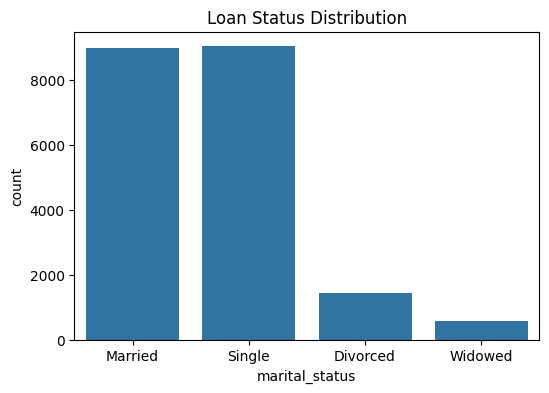

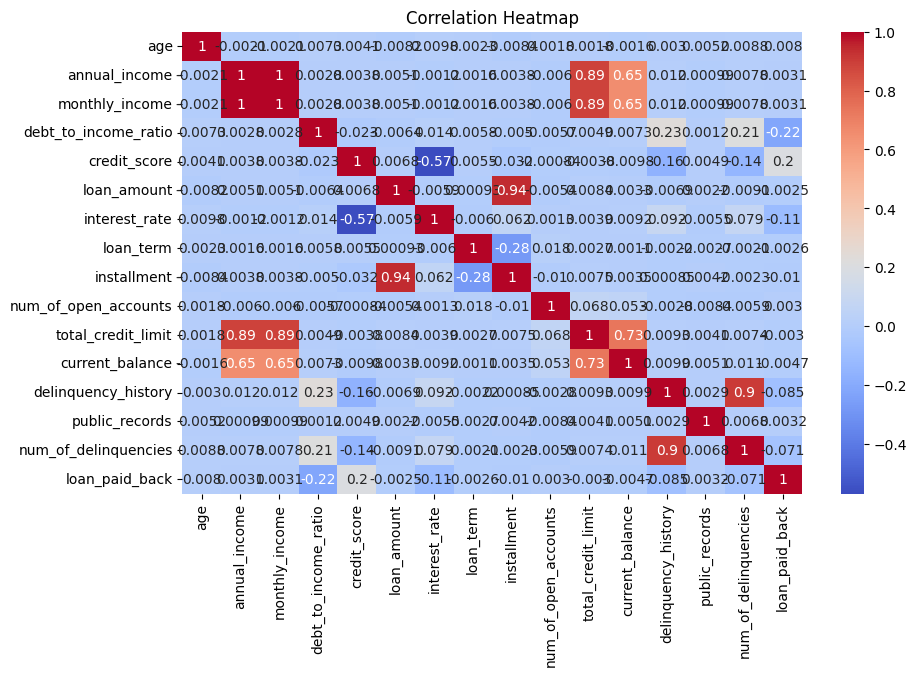

In [6]:

# Loan Status Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df)
plt.title('Loan Status Distribution')
plt.show()

# Line plot: ApplicantIncome vs LoanAmount (if present)
if 'ApplicantIncome' in df.columns and 'LoanAmount' in df.columns:
    df_sorted = df.sort_values('ApplicantIncome')
    plt.figure(figsize=(8,5))
    plt.plot(df_sorted['ApplicantIncome'], df_sorted['LoanAmount'])
    plt.xlabel('Applicant Income')
    plt.ylabel('Loan Amount')
    plt.title('Applicant Income vs Loan Amount (Line Plot)')
    plt.show()

# Property Area vs Loan Status
if 'Property_Area' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='Property_Area', hue=target_col, data=df)
    plt.title('Property Area vs Loan Status')
    plt.show()

# Correlation Heatmap (numeric columns)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [7]:

# Encode categorical columns
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Features and Target using detected column
X = df.drop(target_col, axis=1)
y = df[target_col]

# Standardize numeric features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Preprocessing complete. Training and testing sets created.")


✅ Preprocessing complete. Training and testing sets created.


Model Accuracy: 45.8 %

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       301
           1       0.46      0.49      0.48      1794
           2       0.46      0.53      0.49      1792
           3       0.00      0.00      0.00       113

    accuracy                           0.46      4000
   macro avg       0.23      0.26      0.24      4000
weighted avg       0.41      0.46      0.43      4000



C:\Users\shiva ganesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shiva ganesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shiva ganesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

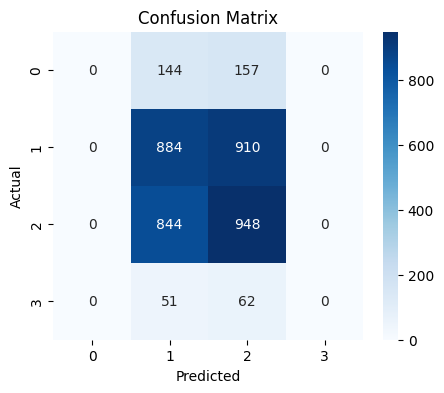

In [8]:

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(acc*100, 2), "%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


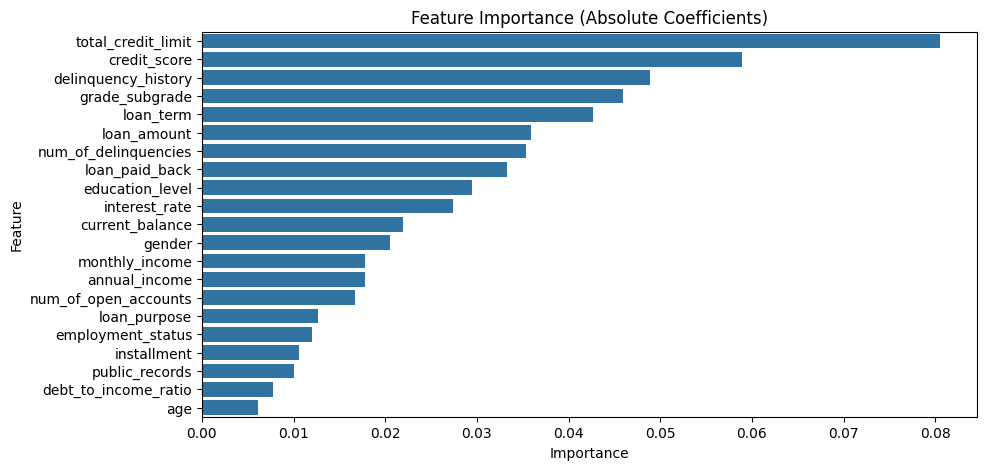

In [9]:

# Feature Importance (from coefficients)
importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(model.coef_[0])})
importance = importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Feature Importance (Absolute Coefficients)')
plt.show()
